<h1 align=center> HW3 - Gaussians and linear regression </h1>
<br>
$$
\textbf{Team G} \\
\text{Evangelou Sotiris 2159}\\
\text{Kalais Konstantinos 2146}\\
\text{Chatziefremidis Leuteris 2209}\\
$$

<h1>1.Mathematical preliminaries</h1>
<hr/>
<b>Consider the function : </b>
$$f(x) = \frac{1}{z} exp(ax^2 + bx + c ) , a < 0 $$
 

<h2>a) Finding the maximum of log(f(x))</h2>

<hr/>
<b>
   Considering  $$ y = log(f(x)) $$ then :
</b>
<b>
    $$ y'(k) = 0 $$ and
    $$ y''(k) < 0 $$ then we got a maximum at x =k
</b>

In [1]:
from sympy import *
import sympy as sy
import numpy as np
from sympy.solvers.inequalities import reduce_inequalities
#Define the function f(x)
x = Symbol('x')
z = Symbol('Z')
a = Symbol('a',positive=False)
b = Symbol('b')
c = Symbol('c')
y = log((1/z)*(exp(a*x**2 +b*x +c)))

#Derivative of log(f(x))
firstDerExp = diff(y,x)

#Second Derivative
secDerExp = diff(firstDerExp,x)

print("First Derivative: "+str(firstDerExp)+"\n")
print("Second Derivative: "+str(secDerExp)+"\n")

#Point where y'(k) = 0
derZero = solve(firstDerExp,x)

print("Point that the first derivative is zero:  k = "+str(derZero[0])+"\n")

print("y''(k) = "+str(secDerExp.subs(x, derZero[0]))+" and because a < 0 then y''(k) <0 ==> maximum at k."+"\n")



First Derivative: (2*a*x + b)*exp(-a*x**2 - b*x - c)*exp(a*x**2 + b*x + c)

Second Derivative: 2*a*exp(-a*x**2 - b*x - c)*exp(a*x**2 + b*x + c) + (-2*a*x - b)*(2*a*x + b)*exp(-a*x**2 - b*x - c)*exp(a*x**2 + b*x + c) + (2*a*x + b)**2*exp(-a*x**2 - b*x - c)*exp(a*x**2 + b*x + c)

Point that the first derivative is zero:  k = -b/(2*a)

y''(k) = 2*a*exp(-c + b**2/(4*a))*exp(c - b**2/(4*a)) and because a < 0 then y''(k) <0 ==> maximum at k.



<h1>b) Gauss Density</h1>
<hr/>
<p>
    $$ g(x) = \frac{1}{\sqrt(2\pi\sigma ^2)}exp(-\frac{1}{2}(\frac{x-\mu }{\sigma })^2) $$
</p>
    

<h3>Proving that f(x) is equivalent to g(x)</h3>


<p>
    $$ f(x) = g(x) $$
    $$ \frac{1}{z} exp(ax^2 + bx + c ) = \frac{1}{\sqrt(2\pi\sigma ^2)}exp(-\frac{1}{2}(\frac{x-\mu }{\sigma })^2)     $$
</p>

<p>
    First Part:
    $$ \frac{1}{z} = \frac{1}{\sqrt(2\pi\sigma ^2)} $$
    $$ z = \sqrt(2\pi\sigma^2) $$
    $$ \sigma =  \frac{z}{\sqrt(2\pi)} $$
</p>

<p>
    Second Part:
       $$ ax^2 + bx + c = -\frac{1}{2}(\frac{x-\mu }{\sigma })^2 $$
       $$ ax^2 + bx + c = -\frac{1}{2\sigma^2}(x^2 -2x\mu + \mu^2) $$
       $$ ax^2 + bx + c = -\frac{1}{2\sigma^2}x^2 + \frac{\mu}{\sigma^2}x - \frac{\mu^2}{2\sigma^2} $$
       $$  a = -\frac{1}{2\sigma^2} $$
       $$  b = \frac{\mu}{\sigma^2} $$
       $$  c = - \frac{\mu^2}{2\sigma^2} $$
</p>

# 2.Linear Regression
<hr/>

$\text{a)}$ 
$$\text{Cost function :}$$
$$\text{L(ω,D) = }\sum_{n=1}^{N}\text{(f(x}_{n}\text{,ω) - y}_{n}\text{)}^{2}\text{ + λ(ω}^{T}\text{ω)}$$
$$\text{ = }\sum_{n=1}^{N}\text{(ω}^{T}\text{x}_{n}\text{ - y}_{n}\text{)}^{2}\text{ + λ(ω}^{T}\text{ω)}$$
$$\text{ = }\sum_{n=1}^{N}\text{(x}_{n}^{T}\text{ω}\text{ - y}_{n}\text{)}^{2}\text{ + λ(ω}^{T}\text{ω)}$$
$$\text{ = (Xω - y)}^{T}\text{(Xω - y)}\text{ + λ(ω}^{T}\text{ω)}$$
<br>
<br>
$\text{where :} $
$$\text{x}_{n}\text{ = [x}_{n1}\text{,....,x}_{nM}\text{]}^{T}$$
<br>
<br>
$$\text{X = [x}_{1}^{T}\text{,....,x}_{n}^{T}\text{] , }\varepsilon\text{ }\mathbb{R}^{NXM}$$
$$\text{y}\text{ = [y}_{1}\text{,....,y}_{n}\text{]}^{T}$$
$$\text{w}\text{ = [w}_{1}\text{,....,w}_{m}\text{]}^{T}$$
<br>
<br>
$$\text{L(ω,D) = (y - Xω)}^{T}\text{(y - Xω) + ω}^{Τ}\text{λIω , I = identity matrix of size M}$$
$$\text{ = (y}^{T} \text{ - ω}^{T}\text{X}^{T}\text{)(y - Xω) +ω}^{T}\text{λIω}$$
$$\text{ = y}^{T}\text{y - y}^{T}\text{Xω -ω}^{Τ}\text{X}^{T}\text{y + ω}^{T}\text{X}^{T}\text{Xω + ω}^{T}\text{λIω}$$
$$\text{ = y}^{T}\text{y - y}^{T}\text{Xω - (y}^{T}\text{X)ω + ω}^{T}\text{(X}^{T}\text{X + λI)ω}$$
$$\text{ = y}^{T}\text{y -2y}^{T}\text{Xω + ω}^{T}\text{(X}^{T}\text{X + λI)ω}$$
<br>
<br>
$$ \frac{\partial L}{\partial ω}\text{ = -2y}^{T}\text{X + 2ω}^{Τ}\text{(Χ}^{T}\text{X + λI) ,**}$$
$$\frac{\partial L}{\partial ω}\text{ = 0}$$
$$\text{-2y}^{T}\text{X + 2ω}^{Τ}\text{(Χ}^{T}\text{X + λI) = 0 }$$
$$\text{ω}^{Τ}\text{(Χ}^{T}\text{X + λI) = y}^{T}\text{X}$$
$$\text{(Χ}^{T}\text{X + λI)ω = Χ}^{Τ}\text{y}$$
$$\text{ω = }\text{(Χ}^{T}\text{X + λI)}^{-1}\text{X}^{T}\text{y}$$
$$\text{(}\sum_{n=1}^{N}\text{x}_{n}\text{x}_{n}^{T}\text{ + λI}_{Μ}\text{)}^{-1}\text{(}\sum_{n=1}^{N}\text{x}_{n}\text{y}_{n}\text{)}$$
<br>
<br>
$$\text{** }$$
$$
\begin{Bmatrix}
 & f(x) = x^{T}Ax\\
 & y(x) = Ax
\end{Bmatrix}
$$
<br>


$$\text{f(x,y) = x}^{T}\text{y} $$
$$\text{f'(x,y) = }\frac{\partial f}{\partial x}\text{ + }\frac{\partial f}{\partial y}\frac{dy}{dx}$$
$$\text{ = }\frac{\partial (x^{T}y)}{\partial x} \text{ + }\frac{\partial (x^{T}y)}{\partial y}\frac{d(Ax)}{dx}$$
$$\text{ = }\frac{\partial (y^{T}x)}{\partial x}\text{ + x}^{T}\text{A }$$
$$\text{ = }y^{T}\text{ + x}^{T}\text{A }$$
$$\text{ = x}^{T}\text{A}^{T}\text{ + x}^{T}\text{A}$$
$$\text{ = x}^{T}\text{(A}^{T}\text{ + A)}$$
<br>
<br>

$$\text{Here: A}^{T}\text{ = (X}^{T}\text{X + λI)}^{T}\text{ = X}^{T}\text{X + λI = A}$$
$$\text{=> f'(x,y) = 2x}^{T}\text{A}$$

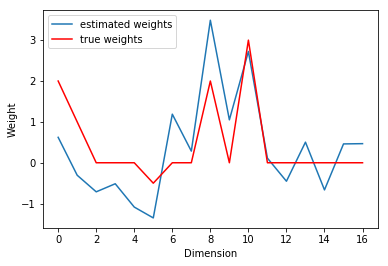

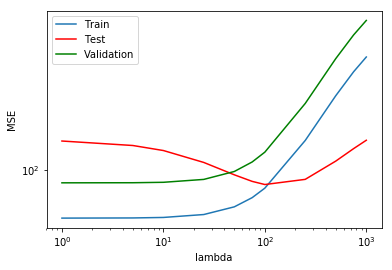

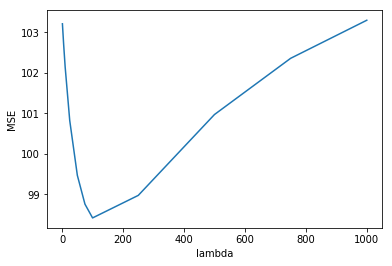

Best MSE = 98.4181 , for λ = 100 to give the best generalization performance


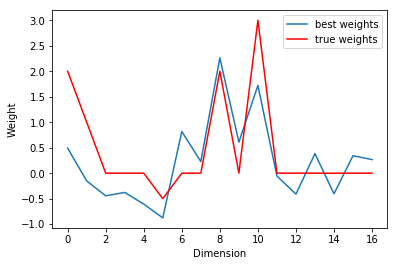

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
from random import *
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#############            (b)            #############

seed(2)

lambdas=0
valid_num=1000
omega_true=[2, 1,0,0,0,-.5,0,0,2,0,3,0,0,0,0,0,0]

xTrain=pd.read_csv('hw3xTrain.csv').values
xTest=pd.read_csv('hw3xTest.csv').values
xValidation=pd.read_csv('hw3xValidation.csv').values
yTrain=pd.read_csv('hw3yTrain.csv').values
yTest=pd.read_csv('hw3yTest.csv').values


lr = LinearRegression()
lr.fit(xTrain,yTrain)
omega=lr.coef_.T

yValidation = np.dot(xValidation,omega) + np.random.randn(valid_num-1,1)*10 

xxtop=np.dot(xTrain.T,xTrain)
xxtop=xxtop + lambdas*np.eye(len(xxtop))
xtopy=np.dot(xTrain.T,yTrain)

omega_o= np.dot(np.linalg.inv(xxtop),xtopy)


plt.figure(1)
plt.plot(omega_o)
plt.plot(omega_true,'r')
plt.xlabel('Dimension')
plt.ylabel('Weight')
plt.legend(['estimated weights', 'true weights'])
plt.show()


#############            (c)            #############
lambdas=[1,5,10,25,50,75,100,250,500,750,1000]

omega=np.zeros((len(lambdas),len(omega_true)))
errorTrain=np.zeros((len(lambdas),1))
errorTest=np.zeros((len(lambdas),1))
errorValidation=np.zeros((len(lambdas),1))

for k in range(0,len(lambdas)):
    omega[k,:]=np.dot(np.linalg.inv(xxtop+lambdas[k]*np.eye(len(omega_true))),xtopy).T
    temp=omega[k,:]
    temp=np.reshape(temp,(1,len(temp)))
    
    ypredTrain=np.dot(temp,xTrain.T).T
    ypredTest=np.dot(temp,xTest.T).T
    ypredValidation=np.dot(temp,xValidation.T).T
    
    errorTrain[k]=np.mean(np.power((ypredTrain-yTrain),2)).T
    errorTest[k]=np.mean(np.power((ypredTest-yTest),2)).T
    errorValidation[k]=np.mean(np.power((ypredValidation-yValidation),2)).T

plt.semilogx(lambdas,errorTrain)
plt.semilogy(lambdas,errorTest,'r')
plt.semilogy(lambdas,errorValidation,'g')
plt.xlabel('lambda')
plt.ylabel('MSE') 
plt.legend(['Train','Test','Validation','location','southeast'])
plt.show()

#############            (d)            #############

plt.xlabel('lambda')
plt.ylabel('MSE') 
plt.plot(lambdas,errorTest)
plt.show()

bestMSE=np.amin(errorTest)
bestlambdaindex=np.argmin(errorTest)

best_omega=omega[bestlambdaindex,:]
best_lambda=lambdas[bestlambdaindex]

print("Best MSE = %.4f " %bestMSE + ", for λ = %d to give the best generalization performance" %best_lambda)



#############            (f)            #############
plt.plot(best_omega)
plt.plot(omega_true,'r');
plt.xlabel('Dimension')
plt.ylabel('Weight')
plt.legend(['best weights','true weights','location','southeast'])
plt.show()

$\bullet$ f) Important dimensions of x for predicting y are those for which the best(predicted) weights 
are close to the real weights => D1=[7,9] and the rest are irrelevant